In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [46]:
df = pd.read_csv(r'drug200.csv')

In [47]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Типы данных в исходных данных

In [48]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### Посмотрим уникальные значения

In [49]:
for column in df.columns:    
    print(f'unique for {column}: {df[column].unique()}')

unique for Age: [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
unique for Sex: ['F' 'M']
unique for BP: ['HIGH' 'LOW' 'NORMAL']
unique for Cholesterol: ['HIGH' 'NORMAL']
unique for Na_to_K: [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 3

### Закодируем бинарные и категориальные признаки цифрами

In [50]:
df['Sex'] = df['Sex'].map({'F':0,'M':1})
df['BP'] = df['BP'].map({'HIGH':0, 'LOW':1, 'NORMAL':2})
df['Cholesterol'] = df['Cholesterol'].map({'HIGH':0, 'NORMAL':1})
df['Drug'] = df['Drug'].map({'DrugY':0, 'drugC':1, 'drugX':2, 'drugA':3, 'drugB':4})

In [51]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1
3,28,0,2,0,7.798,2
4,61,0,1,0,18.043,0


### Посмотрим есть ли пропущенные значения

In [52]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Посмотрим графики

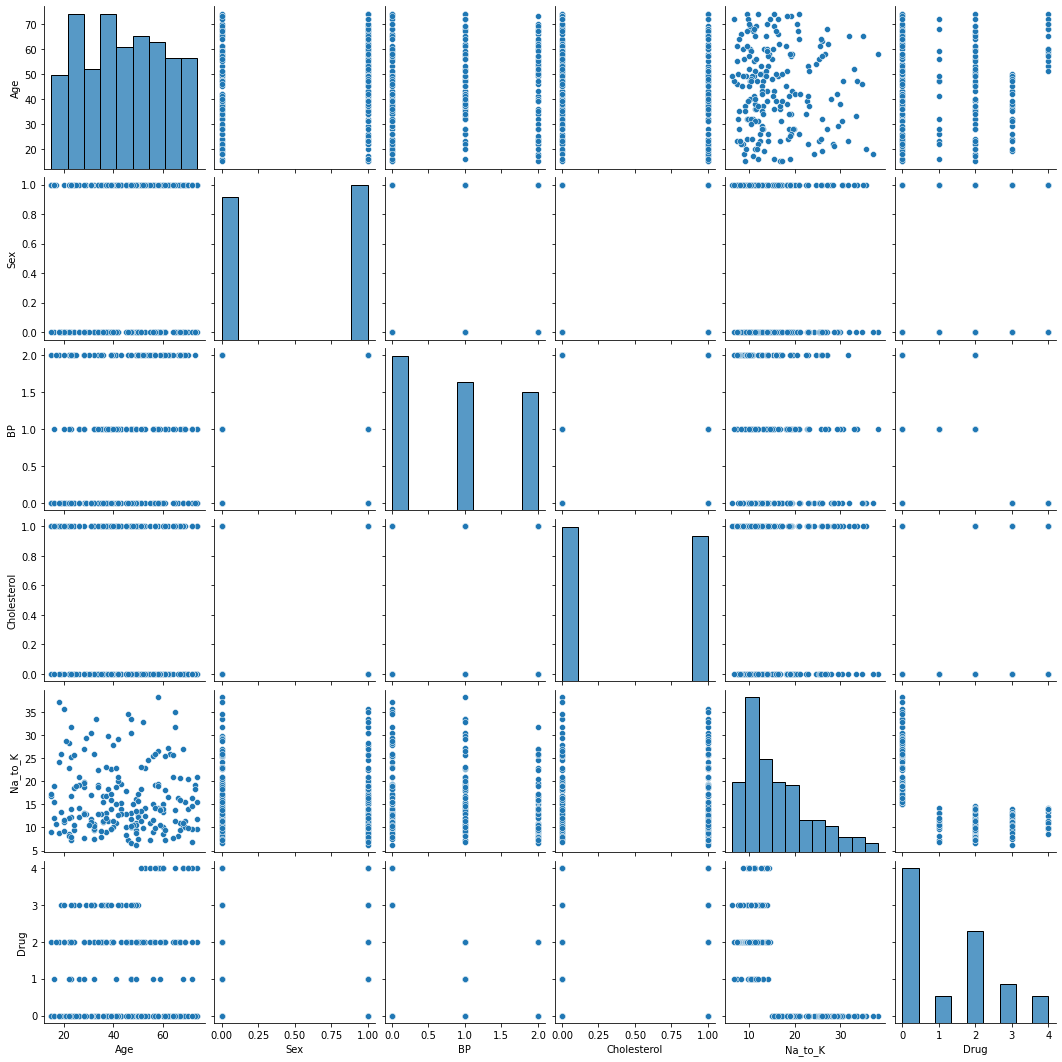

In [54]:
sns.pairplot(df)

### Разделим данные на признаки и классы которые нужно классифицировать

In [111]:
target = df.columns[-1:]
features = df.columns.drop(target,1)
X_train, X_test, y_train, y_test = train_test_split(df[features], np.ravel(df[target]), test_size=0.33, random_state=42)
target, features

(Index(['Drug'], dtype='object'),
 Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object'))

### Инициализируем модель случайного леса, и гиперпараметры модели, заведем поиск оптимальных и передадим все туда

In [112]:
clf = RandomForestClassifier()
params = {
    'n_estimators': list(range(10, 100, 10)),
    'max_depth': list(range(3, 36, 3)),
    'min_samples_split': list(range(2,10,2)),
    'min_samples_leaf': list(range(1, 5, 1))
}
grid = GridSearchCV(estimator=clf, cv=5, param_grid=params, n_jobs=-1)

### Проведем обучение модели 

In [113]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

### Посмотри лучшую модель и лучшие параметры

In [114]:
print(f'best model {grid.best_estimator_} \nbest params {grid.best_params_} \nbest score {grid.best_score_}')

best model RandomForestClassifier(max_depth=15, n_estimators=20) 
best params {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20} 
best score 0.9925925925925926


In [115]:
y_pred = grid.predict(X_test)

In [116]:
report = classification_report(y_test, y_pred, output_dict=True)

In [117]:
pd.DataFrame(report)

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,29.0,6.0,19.0,8.0,4.0,1.0,66.0,66.0


<AxesSubplot:>

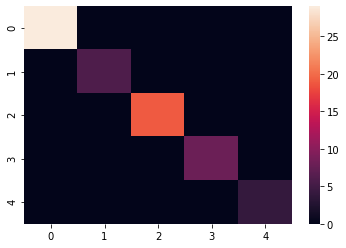

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred))